## Loading and plotting data from a file

First thing we need to do is to import the MSj package.

In [2]:
using MSj

For this first example, the mzXML file from the test folder of the package will be used. In order to dowanload the file, we need the `HTTP`package.


In [3]:
using HTTP

In [4]:
data = download("https://raw.githubusercontent.com/ajgiuliani/MSJ.jl/master/test/test.mzXML", 
                "~/Downloads/test.mzXML") ;

Now, using the `info` function of the `MSj`package, we will see what is inside the file

In [5]:
info(data)

4-element Array{String,1}:
 "6 scans"                
 "MS1+"                   
 "MS2+ 1255.5  CID(CE=18)"
 "MS3+ 902.33  PQD(CE=35)"

Hence, the `test.mzXML`file contains 6 scans. Among these, we find some mass spectrometry scans (`MS1`), measured in the positive ion mode (`+`). 
In addition, we have some MS/MS scans in the positive ion mode as well (`MS2+`) obtained on the m/z 1255.5 precusor under CID activation conditions and with collision energy of 18.  
The file also contains MS3 data in the positive ion measured on the m/z 902.33 precusor under PQD activation conditions with a collision energy of 35.

The data can be loaded into a variable that we can call `s`

In [6]:
s = load(data)

6-element Array{MSj.MSscan,1}:
 MSj.MSscan(1, 0.1384, 5.08195e6, [140.0833282470703, 140.1666717529297, 140.25, 140.3333282470703, 140.4166717529297, 140.5, 140.5833282470703, 140.6666717529297, 140.75, 140.8333282470703  …  1999.25, 1999.3333740234375, 1999.416748046875, 1999.5, 1999.5833740234375, 1999.666748046875, 1999.75, 1999.8333740234375, 1999.916748046875, 2000.0], [236.31689453125, 83.14080810546875, 9.520808219909668, 0.0, 0.0, 0.0, 0.0, 30.42954444885254, 83.86954498291016, 321.0277099609375  …  0.0008099044789560139, 6.637149635935202e-5, 0.0, 0.0, 0.0, 1.9453743504982413e-7, 1.1345706241172593e-7, 1.900308177482657e-8, 0.0, 0.0], 1, 628.333, 102558.0, 0.0, "+", "", 0.0)
 MSj.MSscan(2, 0.7307, 9727.2, [345.0833435058594, 345.1666564941406, 345.25, 345.3333435058594, 345.4166564941406, 345.5, 345.5833435058594, 345.6666564941406, 345.75, 345.8333435058594  …  1999.25, 1999.3333740234375, 1999.416748046875, 1999.5, 1999.5833740234375, 1999.666748046875, 1999.75, 1999.8333740

As expected, the `s` variable contains an array of 6 `MSscans`. The fields of the individual scans may be accessed using the corresponding fields. In the following, `s[1]` refers to the first element of `s` which is a Vector.  In Julia `Vector`is the same as an `Array` wwith on dimension.

In [7]:
s[1].num

1

In [8]:
s[1].polarity

"+"

In [9]:
s[1].level

1

In [10]:
s[1].basePeakMz

628.333

In [11]:
s[1].basePeakIntensity

102558.0

The `println`Julia function may be used as well:

In [12]:
println("s[1].num = $(s[1].num)")
println("s[1].polarity = $(s[1].polarity)")
println("s[1].level = $(s[1].level)")
println("s[1].basePeakMz = $(s[1].basePeakMz)")
println("s[1].basePeakIntensity = $(s[1].basePeakIntensity)")

s[1].num = 1
s[1].polarity = +
s[1].level = 1
s[1].basePeakMz = 628.333
s[1].basePeakIntensity = 102558.0


The mass spectrum is stored in two arrays, one containing the mass to charge ratio and the other one containing the intensities:

In [13]:
s[1].mz

22320-element Array{Float64,1}:
  140.0833282470703
  140.1666717529297
  140.25           
  140.3333282470703
  140.4166717529297
  140.5            
  140.5833282470703
  140.6666717529297
  140.75           
  140.8333282470703
  140.9166717529297
  141.0            
  141.0833282470703
    ⋮              
 1999.0833740234375
 1999.166748046875 
 1999.25           
 1999.3333740234375
 1999.416748046875 
 1999.5            
 1999.5833740234375
 1999.666748046875 
 1999.75           
 1999.8333740234375
 1999.916748046875 
 2000.0            

In [14]:
s[1].int

22320-element Array{Float64,1}:
 236.31689453125        
  83.14080810546875     
   9.520808219909668    
   0.0                  
   0.0                  
   0.0                  
   0.0                  
  30.42954444885254     
  83.86954498291016     
 321.0277099609375      
 719.3600463867188      
 719.0527954101562      
 498.6211853027344      
   ⋮                    
   0.0                  
   0.002726171864196658 
   0.0008099044789560139
   6.637149635935202e-5 
   0.0                  
   0.0                  
   0.0                  
   1.9453743504982413e-7
   1.1345706241172593e-7
   1.900308177482657e-8 
   0.0                  
   0.0                  

We also need to a package to plot. We will use the `Plots` package using the default backend.

In [15]:
using Plots

We can plot this mass spectrum using the `Plots` package.

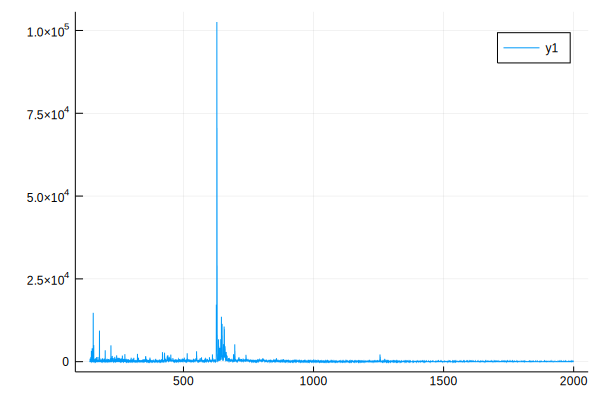

In [16]:
plot(s[1].mz, s[1].int)

We use a recepie for plotting MSscans:

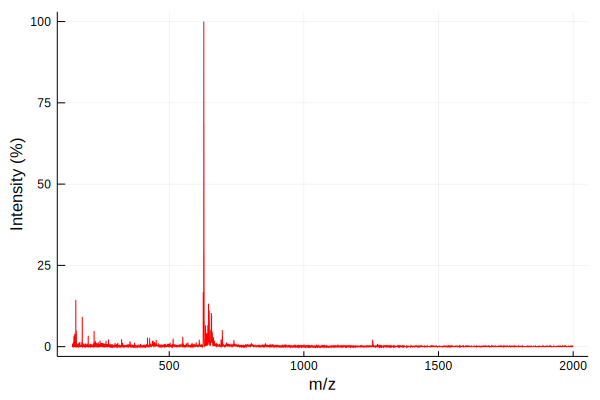

In [17]:
plot(s[1])

The previous graph is plotted in relative intensity. Absolute intensities are plotted by specifying the `:absolute` keyword:

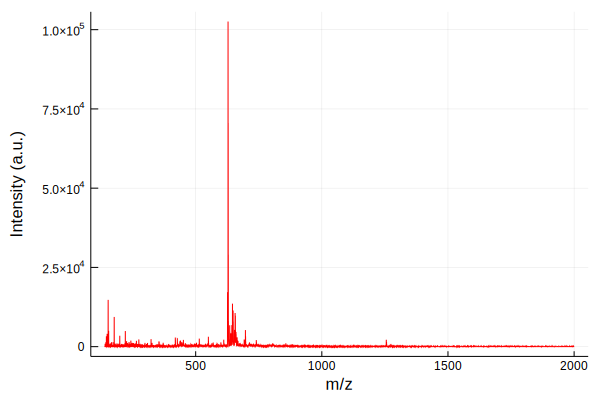

In [18]:
plot(s[1], method = :absolute)

In [19]:
plotly()

Plots.PlotlyBackend()

Note the interactivity provided by the Plotly backend

In [20]:
plot(s[1])

<!DOCTYPE html>
 
 
 Plots.jl